<a href="https://colab.research.google.com/github/Saisathvik-Achanta/Natural-Language-Processing/blob/main/B9_NLP_A4_2203A51330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Load data fromkeras.datasets and perform following computational analysis:-
(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Recurrent Neural network (RNN) Model

(d) Training the RNN Model

(e) Evaluate the model on the test dataset to see how well it generalizes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.5996 - loss: 0.6437 - val_accuracy: 0.8036 - val_loss: 0.4413
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8467 - loss: 0.3606 - val_accuracy: 0.8175 - val_loss: 0.4153
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9256 - loss: 0.2019 - val_accuracy: 0.8158 - val_loss: 0.4666
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9681 - loss: 0.1003 - val_accuracy: 0.8117 - val_loss: 0.5665
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9725 - loss: 0.0794 - val_accuracy: 0.8066 - val_loss: 0.6601


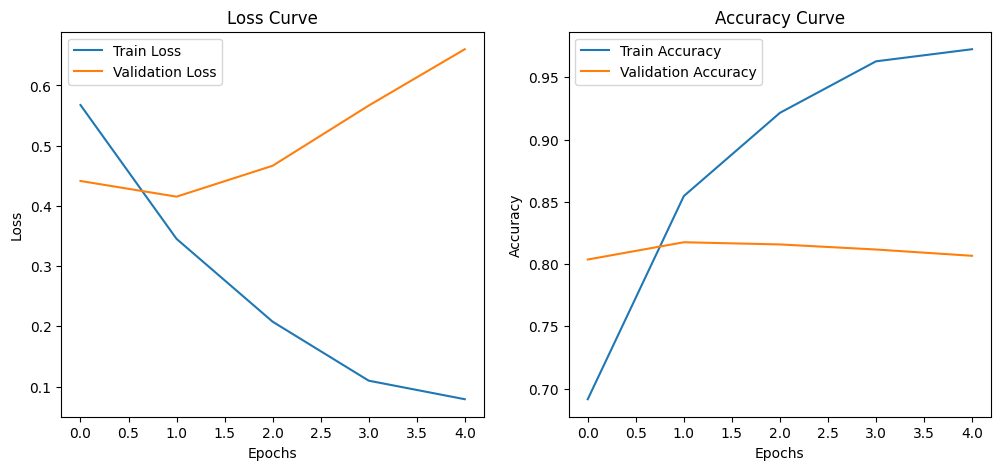

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8038 - loss: 0.6635
Test accuracy: 0.8066400289535522


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

2.Develop LSTM (Long Short-Term Memory) by utilizing data set from https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorialLinks to an external site. or take any time series data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

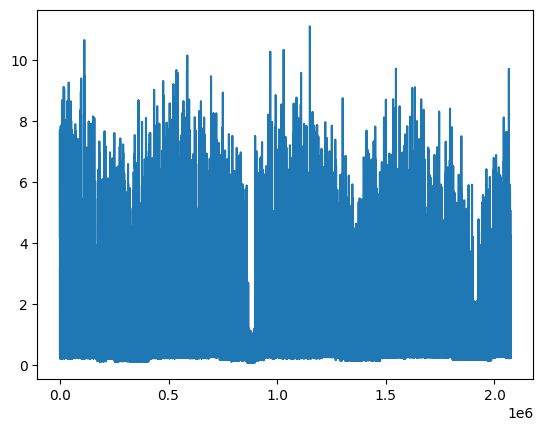

In [16]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},
                 dayfirst=True, low_memory=False, na_values=['nan','?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df['Global_active_power'].values.astype(float)

plt.plot(data)
plt.show()


In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

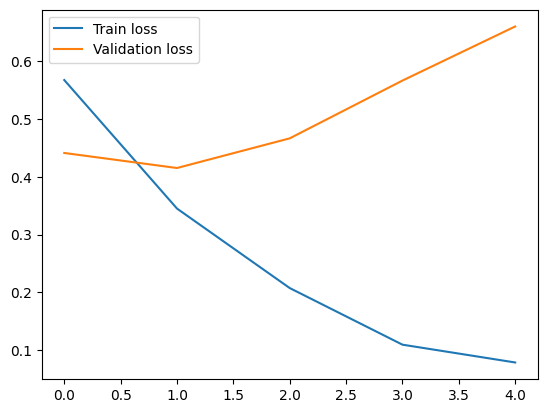

12970/12970 ━━━━━━━━━━━━━━━━━━━━ 112s 9ms/step


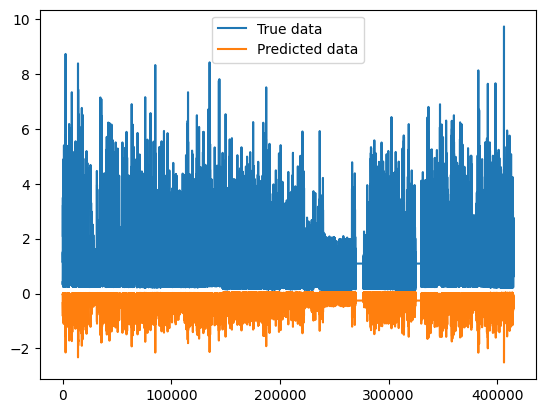

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.plot(data[-len(predicted):], label='True data')
plt.plot(predicted, label='Predicted data')
plt.legend()
plt.show()

3. Demonstrate Vanishing and Exploding Gradients on deep neural network

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def generate_data(n_samples=1000, n_features=20):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, size=(n_samples, 1))
    return X, y

def create_deep_network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation=activation))
    for _ in range(10):
        model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

class GradientMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = []
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads.append(tf.reduce_mean(tf.abs(layer.kernel)))
        if grads:
            grad_mean = np.mean([g.numpy() for g in grads])
            print(f"Epoch {epoch+1}: Gradient Mean: {grad_mean:.4f}")

X, y = generate_data()

model = create_deep_network()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(X, y, epochs=5, batch_size=32, callbacks=[GradientMonitorCallback()])

loss, accuracy = model.evaluate(X, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.7091Epoch 1: Gradient Mean: 0.1128
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5059 - loss: 0.7089
Epoch 2/5
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5238 - loss: 0.6942  Epoch 2: Gradient Mean: 0.1128
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5199 - loss: 0.6939
Epoch 3/5
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4962 - loss: 0.6935 Epoch 3: Gradient Mean: 0.1128
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 0.6936
Epoch 4/5
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.6931 Epoch 4: Gradient Mean: 0.1128
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5111 - loss: 0.6931
Epoch 5/5
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5033 - loss: 0.6935 Epoch 5: Gradient Mean: 0.1128
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5036 - loss: 0.6935
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac